In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [5]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [7]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [11]:
print(dataset.head());

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [13]:
X = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [21]:
y_pred = classifier.predict(X_test)

In [23]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[65  3]
 [ 8 24]]


In [25]:
TN, FP, FN, TP = cm.ravel()
print(f"TP = {TP}, FP = {FP}, TN = {TN}, FN = {FN}")

TP = 24, FP = 3, TN = 65, FN = 8


In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [29]:
error_rate = 1 - accuracy
print(f"Error Rate: {error_rate:.2f}")

Error Rate: 0.11


In [31]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

Precision: 0.89


In [33]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.75


In [35]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.81


In [37]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Purchased', 'Purchased']))


Classification Report:
               precision    recall  f1-score   support

Not Purchased       0.89      0.96      0.92        68
    Purchased       0.89      0.75      0.81        32

     accuracy                           0.89       100
    macro avg       0.89      0.85      0.87       100
 weighted avg       0.89      0.89      0.89       100



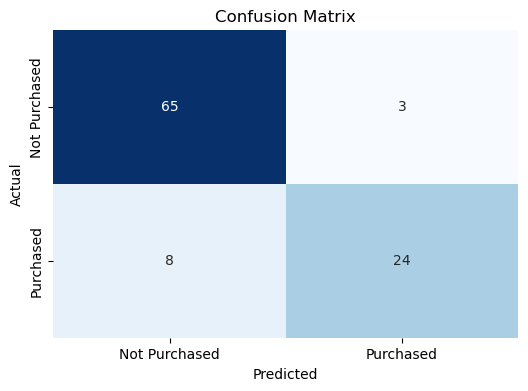

In [39]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Purchased', 'Purchased'],
            yticklabels=['Not Purchased', 'Purchased'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                     np.arange(x2_min, x2_max, 0.1))

In [43]:
Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

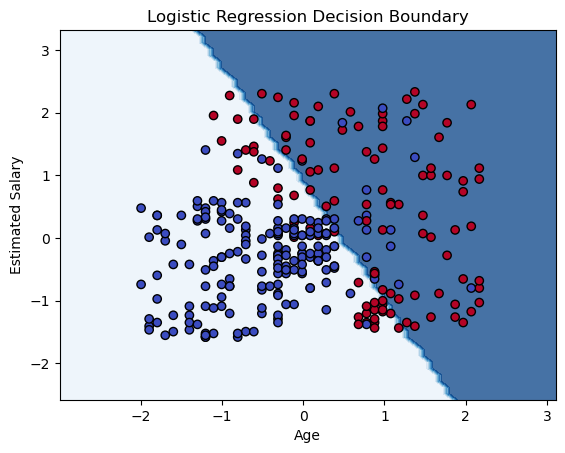

In [45]:
plt.contourf(xx, yy, Z, alpha=0.75, cmap='Blues')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', cmap='coolwarm')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()